In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Regresión logística: base de datos del INTA<br>
Usaremos un dataset del INTA (Instituo Nacional de Tecnologia Agropecuaria) que registra temperaturas minimas y maximas, precipitaciones, humedad y mas para un dia (en este caso, usamos las de San Fernando). Tenemos las de 2018 hasta la actualidad.

Importamos la base de datos:

In [21]:
filename = "datosDiariosSanFernandoINTA.xls"
datos = pd.read_excel(filename)
#veamos los primeros elementos del dataset
print(datos.head())

                   Fecha  Temperatura_Abrigo_150cm  \
0  2018-02-08 00:00:00.0                       NaN   
1  2018-02-09 00:00:00.0                  23.80764   
2  2018-02-10 00:00:00.0                  24.51389   
3  2018-02-11 00:00:00.0                  19.50139   
4  2018-02-12 00:00:00.0                  16.70625   

   Temperatura_Abrigo_150cm_Maxima  Temperatura_Abrigo_150cm_Minima  \
0                              NaN                              NaN   
1                             28.6                             20.4   
2                             31.7                             19.4   
3                             24.2                             15.1   
4                             24.6                              9.5   

   Temperatura_Intemperie_5cm_Minima  Temperatura_Intemperie_50cm_Minima  \
0                                NaN                                 NaN   
1                                NaN                                 NaN   
2                   

Nos quedamos solo con ciertos campos del dataset

In [22]:
columnas = ['Temperatura_Abrigo_150cm_Maxima','Temperatura_Abrigo_150cm_Minima',
            'Precipitacion_Pluviometrica', 'Velocidad_Viento_Maxima',
            'Rocio_Medio', 'Humedad_Media']
#de los datos, solo nos quedamos con estas columnas
df = datos.loc[:, columnas]

Hacemos dropna para deshacernos de las columnas vacias

In [23]:
df.dropna(inplace=True)
print(df)

      Temperatura_Abrigo_150cm_Maxima  Temperatura_Abrigo_150cm_Minima  \
1                                28.6                             20.4   
2                                31.7                             19.4   
3                                24.2                             15.1   
4                                24.6                              9.5   
5                                28.8                             10.2   
...                               ...                              ...   
1149                             29.6                             16.2   
1150                             31.6                             17.9   
1151                             27.4                             18.1   
1152                             22.3                             18.9   
1153                             21.2                             17.9   

      Precipitacion_Pluviometrica  Velocidad_Viento_Maxima  Rocio_Medio  \
1                           11.75   

Renombramos las columnas

In [24]:
renombres = {
             'Temperatura_Abrigo_150cm_Maxima' : 'temperaturaMaxima',
             'Temperatura_Abrigo_150cm_Minima' : 'temperaturaMinima',
             'Precipitacion_Pluviometrica' : 'precipitacion',
             'Humedad_Media' : 'humedad',
             'Rocio_Medio' : 'rocio',
             'Velocidad_Viento_Maxima' : 'viento'
             }
df.rename(renombres, axis=1, inplace=True)
#veamos como quedo el dataset con columnas renombradas
print(df)

      temperaturaMaxima  temperaturaMinima  precipitacion  viento      rocio  \
1                  28.6               20.4          11.75    19.3  16.462780   
2                  31.7               19.4          10.50    19.0  18.622350   
3                  24.2               15.1           0.00    20.4  12.071650   
4                  24.6                9.5           0.25    13.4   9.627476   
5                  28.8               10.2           0.00    10.4  12.139410   
...                 ...                ...            ...     ...        ...   
1149               29.6               16.2           0.00    12.3  14.987480   
1150               31.6               17.9           0.00    10.9  16.699790   
1151               27.4               18.1          28.00    13.7  17.514750   
1152               22.3               18.9           4.50     7.4  10.707290   
1153               21.2               17.9          17.75    11.7  10.575290   

      humedad  
1        66.0  
2      


<br>
Agrego ahora una nueva columna para crear una nueva feature de<br>
temperaturaMinima x temperaturaMaxima.<br>
Le asigno los valores de temperatura minima multiplicados por los de<br>
temperatura maxima<br>


In [25]:
df["tempMinxMax"] = df["temperaturaMinima"] * df["temperaturaMaxima"]
print(df)

      temperaturaMaxima  temperaturaMinima  precipitacion  viento      rocio  \
1                  28.6               20.4          11.75    19.3  16.462780   
2                  31.7               19.4          10.50    19.0  18.622350   
3                  24.2               15.1           0.00    20.4  12.071650   
4                  24.6                9.5           0.25    13.4   9.627476   
5                  28.8               10.2           0.00    10.4  12.139410   
...                 ...                ...            ...     ...        ...   
1149               29.6               16.2           0.00    12.3  14.987480   
1150               31.6               17.9           0.00    10.9  16.699790   
1151               27.4               18.1          28.00    13.7  17.514750   
1152               22.3               18.9           4.50     7.4  10.707290   
1153               21.2               17.9          17.75    11.7  10.575290   

      humedad  tempMinxMax  
1        6


<br>
Agrego otra nueva feature just for the laughs, que sea la temperatura minima<br>
multiplicada por si misma<br>


In [26]:
df["tempMinxMin"] = df["temperaturaMinima"] * df["temperaturaMinima"]


<br>
Teniendo en cuenta que queremos saber si llueve o no llueve un dia, vamos a<br>
llevar a una categoria binaria la columna precipitacion.<br>
Generamos una nueva columna que sea "llueveNollueve" que de cuenta de esto<br>


In [27]:
df["llueveNollueve"] = 0 #Creamos la nueva columna y la llenamos de ceros
#Identificamos los indices de la columna precipitacion que tienen filas > 0
indices = df["precipitacion"] > 0
#El criterio adoptado es decir que en ese dia llovio, aunque sea que llovio 1mm
#ponemos 1 en las columnas de llueveNollueve donde llovio. Las otras quedan en 0
df.loc[indices, "llueveNollueve"] = 1
print(df)

      temperaturaMaxima  temperaturaMinima  precipitacion  viento      rocio  \
1                  28.6               20.4          11.75    19.3  16.462780   
2                  31.7               19.4          10.50    19.0  18.622350   
3                  24.2               15.1           0.00    20.4  12.071650   
4                  24.6                9.5           0.25    13.4   9.627476   
5                  28.8               10.2           0.00    10.4  12.139410   
...                 ...                ...            ...     ...        ...   
1149               29.6               16.2           0.00    12.3  14.987480   
1150               31.6               17.9           0.00    10.9  16.699790   
1151               27.4               18.1          28.00    13.7  17.514750   
1152               22.3               18.9           4.50     7.4  10.707290   
1153               21.2               17.9          17.75    11.7  10.575290   

      humedad  tempMinxMax  tempMinxMin

Veamos cuantos dias llovio y cuantos no llovio

In [28]:
print(df["llueveNollueve"].value_counts())

0    717
1    337
Name: llueveNollueve, dtype: int64



## REGRESION LOGISTICA
Estamos listos para jugar con sklearn y la clasificacion.
Vamos a buscar relacionar las caracteristica: temperaturaMaxima,
temperaturaMinima, humedad, con la etiqueta llueveNollueve
Es decir, habiendo tageado a los dias que llueven, vamos a estudiar las
features temperaturaMaxima, temperaturaMinima, humedad para poder crear un
modelo que, si le presentamos nueva informacion de dichas features, pueda
clasificar un dia correctamente como lluvioso o no.<br>
De la data del pasado, vamos a poder predecir cosas sobre la nueva data.
Vamos a usar dos features lineales, es decir, la regresion logistica<br>
multivariable mas simple, con $X = beta2 * y + beta1 * x + beta0$
seleccionamos la columna de temperaturaMinima y temperaturaMaxima,
que seran los datos de mi variable aleatoria X.<br>
Nos quedamos entonces con el dataframe temperaturaMinima y temperaturaMaxima<br>


In [29]:
df_features = df[["temperaturaMaxima", "temperaturaMinima"]]
print(df_features)
print(type(df_features))

      temperaturaMaxima  temperaturaMinima
1                  28.6               20.4
2                  31.7               19.4
3                  24.2               15.1
4                  24.6                9.5
5                  28.8               10.2
...                 ...                ...
1149               29.6               16.2
1150               31.6               17.9
1151               27.4               18.1
1152               22.3               18.9
1153               21.2               17.9

[1054 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


Debemos converirlo a una matriz para que sklearn pueda trabajar con ella

In [30]:
X = df_features.values
#NOTA : Otra forma de hacer esto es con
X_1 = df_features.to_numpy()


<br>
Obtengo el vector de tags, llueveNollueve. Primero la series del dataframe y<br>
luego lo paso a vector<br>


In [31]:
serie_llueveNollueve = df["llueveNollueve"]
z = serie_llueveNollueve.values
print(z)

[1 1 0 ... 1 1 1]


Creo el modelo de regresion logistica

In [32]:
regLog = LogisticRegression(penalty="none") #instancio el objeto de regresion logistica
#fiteo la data
regLog.fit(X, z)

LogisticRegression(penalty='none')


<br>
Veamos los coeficientes fiteados. Los coeficientes que mejor ajustan la<br>
data redondeados a 4 decimales son:<br>


In [33]:
beta2 = regLog.coef_[0][1].round(4)
beta1 = regLog.coef_[0][0].round(4)
beta0 = regLog.intercept_[0].round(4)
print("beta2: ", beta2)
print("beta1: ", beta1)
print("beta0: ", beta0)

beta2:  0.1811
beta1:  -0.1255
beta0:  0.1828



<br>
Podria usar el predict que viene en el modelo, o podria crear mi propia<br>
funcion de regresion logistica y usar los parametros que ya ajusto sklearn:<br>
Creo una funcion logistica generica a la cual le pasare los beta1, beta0<br>
que mejor se ajustan a mis datos<br>


In [34]:
def f_logistica(X, beta2, beta1, beta0):
    #X = [x, y]
    #multiplico beta2 por la segunda columna, beta1 por la primera, y
    #les sumo a todos beta0
    return (1 / (1 + np.e ** -(beta2 * X[:,1] + beta1 * X[:,0] + beta0)))

La prediccion de datos futuros viene dada por

In [35]:
z_pred1 = f_logistica(X, beta2, beta1, beta0)
print(z)

[1 1 0 ... 1 1 1]



<br>
Ploteo la nube de puntos reales y lo que el modelo predice con el fiteo<br>
realizado<br>


In [36]:
from mpl_toolkits.mplot3d import Axes3D

C:\Users\rafaels100\AppData\Local\Temp\ipykernel_7048\501098934.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


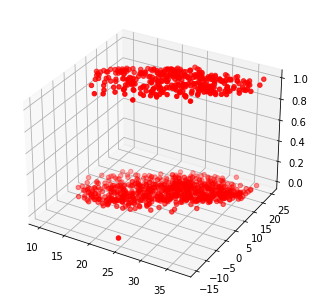

In [37]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], z, color="r")
plt.show()


<br>
Ahora, usando la propia funcion de prediccion creada por el modelo:<br>
(antes la armamos a mano a la funcion logistica, aqui viene armada)<br>
<br>
Para la regresion creada, predigo los valores de X y los ploteo:

In [38]:
z_pred = regLog.predict(X)
print(z_pred)
ax.scatter(X[:,0], X[:,1], z_pred, color="b")
plt.show()

[1 0 0 ... 1 1 1]



<br>
Vemos que la regresion captura bastante bien los puntos en el piso, pero<br>
no asi los puntos en el techo. Esto es asi porque, al haber mas puntos<br>
en el piso, decidio capturar esos y sacrificar los del techo en orden de<br>
capturar la mayor cantidad posible.<br>


Veamos ahora la forma del tobogan

In [39]:
ax.scatter(X[:,0], X[:,1], z_pred1, color="g")
plt.show()


<br>
Con dataset recortado a 50 dias:<br>
df = datos.loc[:50, columnas]<br>
Si miras desde el angulo adecuado, se ve la forma del tobogan verde, y si ve<br>
que esta bastante mas cerca del 0 que del 1, pues hay muchos mas puntos<br>
en el piso que en el techo.<br>
En consecuencia, vemos que el modelo predice que TODOS los dias no llueve<br>
(ver que los puntos azules de la prediccion estan todos en el piso, no hay<br>
ninguno en el techo, pues la forma de la S esta muy pegada al piso).<br>
Resulta entonces que este NO es un buen modelo, pues clasifica todos los dias<br>
como no llueve, hay 0 chances de que nos diga que algun dia llovio...<br>
well, no se que tan malo sea, tal vez necesite mas data<br>


In [40]:
print(regLog.score(X, z))
#well, tan malo no es... 0.76 es mejor que cada uno de los features por separado,
#so its a success I'll say.

0.7277039848197343



<br>
Con dataset considerando todos los dias<br>
df = datos.loc[:, columnas]<br>
Ahora si que es clara la forma de S, y ademas vemos que las predicciones (azules)<br>
sacrifican pegarle a bastantes rojas que estan en el techo al principio<br>
para poder pegarles a las que estan en el suelo, mientras que al final prefieren<br>
pegarle a las rojas del techo, sacrificando pegarle a las que estan en el suelo<br>
al final.<br>
El score es 0.727, mientras que la capacidad de clasificar de cada una de las<br>
features por separado con toda la data era de:<br>
temperaturaMinima: 0.685<br>
temperaturaMaxima: 0.6803<br>
Concluimos entonces que, al combinar estas features linealmente, fuimos<br>
capaces de clasificar mejor a los dias lluviosos de los que no, que si<br>
tuvieramos las features por separado.<br>
